<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_CNN_B_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 3.5MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 361 (delta 38), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (361/361), 202.49 MiB | 29.42 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 22.15 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     130  128.476929  135.798111  ...  162.551483  174.763077  192.380600
1     169  218.139496  216.005295  ...    1.183432    0.612794    0.773502
2     194  135.596649  139.299271  ...  199.255280  197.183838  152.034958
3     141  119.244408  116.487411  ...  145.617828  130.322861  124.465012
4     197  152.838974  138.385208  ...  169.878799  218.168442  229.160919
5     126  123.432106  108.493820  ...    1.000000    1.000000    0.802469
6     196  150.061218  188.673462  ...    1.448980    0.183673    1.306122
7     166  112.043243  107.135719  ...   80.328926   96.132950   95.035561
8     185   51.852795   52.599037  ...    0.293177    1.536421    0.986355
9     121   99.786629  108.390007  ...    0.025271    0.682535    1.000000
10    139   95.318825   84.306442  ...    1.024740    0.039128    0.844884
11    113  150.933823  137.092178  ...  183.742584  184.280518  184.094604
12    177   94.348549  10

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.93 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 20s 147ms/step - loss: 0.5884 - accuracy: 0.6638 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 50ms/step - loss: 0.3293 - accuracy: 0.8284 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 51ms/step - loss: 0.2131 - accuracy: 0.9011 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 1s 50ms/step - loss: 0.1031 - accuracy: 0.9780 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 49ms/step - loss: 0.0686 - accuracy: 0.9845 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 52ms/step - loss: 0.0329 - accuracy: 0.9958 - val_loss: 0.6929 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 50ms/step - loss: 0.0255 - accuracy: 0.9945 - val_loss: 0.6925 - val_accuracy: 0.5102
Epoc

In [17]:
Y_test = yback(Y_test)

In [18]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        62  10
1         1  74


In [19]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
3   123.0  126.321640  149.682999  ...   16.398506    9.290436    9.901316
7   167.0   97.423691   87.658974  ...   52.425552   61.184086   70.082153
15  108.0  218.030182  193.765427  ...    0.567901    0.587106    1.115226
23  102.0   94.346413   97.222237  ...   78.223381   59.680515   47.980396
26  122.0   59.502548   61.048370  ...    5.804622    0.637194    0.943563
30  106.0   90.440369   92.909576  ...  122.928802  123.701324  125.370239
31  135.0   80.397202   79.047409  ...   99.931244   92.554176   90.774536
44  150.0   73.120888   75.500626  ...   62.993423   61.666309   57.215466
17  151.0   82.716721   80.792862  ...   48.814579   48.426605   61.250690
21  183.0   87.842781   86.051872  ...   45.935799   49.151276   51.449821
28  167.0    0.916670    2.521317  ...    0.000000    0.000000    0.000000
40  116.0   85.135551   84.946487  ...   91.442329  104.586212  112.882278
6   169.0   84.213684   8

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 645, done.
remote: Counting objects: 100% (406/406), done.
remote: Compressing objects: 100% (404/404), done.
remote: Total 645 (delta 252), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (645/645), 5.39 MiB | 14.47 MiB/s, done.
Resolving deltas: 100% (389/389), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 7.13 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
3,123.0,126.321640,149.682999,164.413239,49.738255,33.192875,49.254215,45.334988,43.010448,40.823055,45.392693,50.675259,52.933571,53.862915,54.293079,53.039135,47.661777,36.027431,18.198757,5.274639,2.333532,0.804085,0.576046,0.434926,0.153612,0.000000,0.000000,0.000000,0.000000,130.997681,155.305573,166.455811,55.335587,27.947454,42.469498,39.772686,38.032719,42.111443,48.200012,52.153481,...,56.452248,50.422501,49.113426,46.690399,43.202133,42.096836,41.532951,37.530575,29.926565,20.155790,11.573336,10.151033,59.376560,48.787495,35.002579,28.184547,27.038139,27.883009,29.120102,30.610086,36.366646,44.798138,50.030670,53.636330,53.939190,56.924713,58.507641,56.714790,53.686298,51.976738,47.356403,43.366055,41.351910,39.652523,39.981495,35.904823,24.799988,16.398506,9.290436,9.901316
7,167.0,97.423691,87.658974,76.917931,71.742767,73.053711,81.083908,86.514359,94.943138,109.098030,117.098175,116.671165,118.585686,121.194786,119.774300,120.165306,125.201630,125.296509,123.500175,123.093384,122.895599,126.977280,130.982162,129.934357,123.833305,115.457214,101.210518,92.874939,84.684898,97.289803,88.071686,76.544876,71.917610,74.739113,89.128082,105.299545,112.015961,120.726288,122.380699,123.050529,...,131.762756,209.716125,184.262344,57.778625,89.728546,93.389839,106.122665,86.259293,39.189075,55.030876,62.505760,70.034111,84.135605,84.168526,85.057159,85.625412,87.072502,87.679199,84.295395,85.037971,84.173798,77.764107,64.769699,60.940159,103.215675,234.335190,209.339142,192.290482,154.007858,145.467941,116.190910,73.543549,95.629074,97.699783,116.377754,88.860878,33.451328,52.425552,61.184086,70.082153
15,108.0,218.030182,193.765427,93.824417,105.836761,119.075439,117.146774,105.367622,94.094650,89.596710,88.747597,90.000000,89.371735,84.485596,76.112480,68.941017,63.094643,62.178326,62.595333,61.554184,60.814812,55.916321,51.038406,50.347050,51.204388,53.203018,59.846367,67.248283,73.640602,215.584351,233.042511,183.179688,90.348419,112.336075,115.396431,108.735245,96.001373,88.485588,88.004112,85.545952,...,0.868313,1.181070,1.834019,1.426612,1.482853,1.042524,1.160494,1.241427,1.200274,1.271605,1.554184,2.679012,1.935528,0.705075,0.000000,0.067215,0.000000,0.000000,0.000000,0.057613,0.633745,0.086420,0.000000,0.016461,0.644719,0.673525,0.259259,0.441701,0.469136,0.780521,0.876543,0.474623,0.289438,0.172840,0.271605,0.035665,0.533608,0.567901,0.587106,1.115226
23,102.0,94.346413,97.222237,99.785477,99.092667,98.594780,99.333725,97.554794,98.869675,99.618233,100.347183,93.888519,92.098427,91.931190,92.921577,92.049606,90.458672,88.937721,88.640915,90.892357,94.359489,99.519806,102.694748,107.710503,110.543266,111.032303,111.828156,112.424072,109.356033,97.905823,101.250679,104.000786,104.350639,103.011543,100.245682,98.492897,97.188782,99.068451,97.916580,93.567871,...,50.549793,46.350639,55.567863,76.697426,97.567490,109.421394,114.580559,114.019234,111.801239,104.554802,94.151871,72.158791,94.672829,95.124954,95.435226,94.863907,94.826996,95.225311,99.288742,100.658218,100.181091,102.277206,101.772789,99.500587,98.396782,96.416771,91.871216,81.794319,57.606308,44.361404,48.639759,51.341026,60.805470,78.973862,90.958870,93.934647,89.603622,78.223381,59.680515,47.980396
26,122.0,59.502548,61.048370,60.705727,62.353127,63.745224,64.448799,67.382690,65.985756,62.854336,62.263634,61.737972,59.830421,60.321419,59.653858,59.345329,59.810265,60.091640,57.084923,53.662186,43.755707,34.008598,16.520288,7.384573,4.740661,1.719699,1.270895,1.052674,1.000000,59.541252,59.131683,57.181400,59.163124,61.310398,61.558178,62.936035,63.368717,60.409836,59.476212,60.169037,...,24.588013,22.142433,20.885782,21.580219,21.020155,16.038698,14.990593,15.334049,12.862402,7.

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

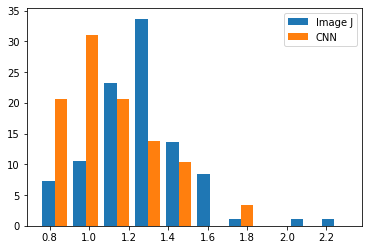

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.17894737, 0.41052632, 0.74736842, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.20689655, 0.51724138, 0.72413793, 0.86206897, 0.96551724,
         0.96551724, 1.        , 1.        , 1.        , 1.        ]]),
 array([0.74706594, 0.90410327, 1.06114059, 1.21817792, 1.37521524,
        1.53225257, 1.68928989, 1.84632722, 2.00336454, 2.16040187,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

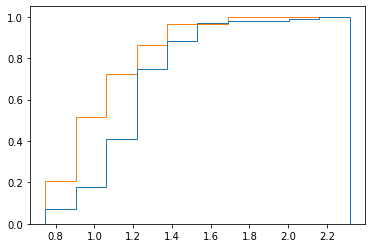

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.7871625525064307


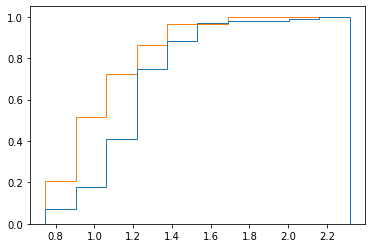

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [31]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [38]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.787163,1.0,0.92517,0.000004,0.39081,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.74706594 0.90410327 1.06114059 1.21817792 1.37521524 1.53225257
 1.68928989 1.84632722 2.00336454 2.16040187 2.31743919]
[[ 7.36842105 10.52631579 23.15789474 33.68421053 13.68421053  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [20.68965517 31.03448276 20.68965517 13.79310345 10.34482759  0.
   3.44827586  0.          0.          0.        ]]


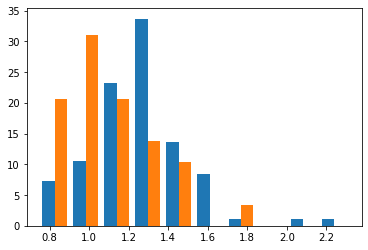

In [34]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [35]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


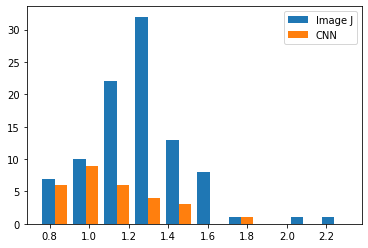

In [36]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [37]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1